#INTORDUCTION

Alzheimer's disease is a progressive neurologic disorder. Alzheimer's disease is the most common cause of dementia — a continuous decline in thinking, behavioral and social skills that affects a person's ability to function independently. This project is aming to develop a model to predict different progressive levels of Alzheimer's Disease (AD) by using the real dataset that provided by *National Alzheimer'S Coordinating Center (NACC)*. The dataset contains 4 different progressive levels of AD which is 0.0: no impairment, 0.25: questionable impairment, 0.5:Mild impairment and 1.0: Moderate & Severe impairment. In this challenge, we will try to use the tensorflow library to develop a basic Sequential model.

In multi-class classification, we have one basic assumption that our data can belong to only one label out of all the labels we have. Since the disease level classes are mutually exclusive, this is a **multi-class classification problem.

###Variable Descriptions

1.   'EDUC' → Years of education (Numeric)
2.   'NACCMOCA' → MoCA Total Score (Numeric)
3.   'MARISTAT' →  Marital status (Categorical)
4.   'NACCFAM' → Indicator of first-degree family member with cognitive impairment (Categorical)
5.   'NACCGDS' → Total GDS Score (Numeric)
6.   'NACCNE4S' → Number of APOE e4 alleles numeric cross-sectional (Categorical)
7.   'NACCAPOE' → APOE genotype (Categorical)
8.   'INDEPEND' → Level of independence (Categorical)
9.   'RESIDENC' → Type of residence (Categorical)
10.  'ANYMEDS' → Subject taking any medications (Categorical)
11.  'NACCAMD' → Total number of medications reported at each visit (Numeric)
12.  'DEL' → Delusions in the last month (Categorical)
13.  'HALL' → Hallucinations in the last month (Categorical)
14.  'DEPD' → Depression or dysphoria in the last month (Categorical)
15.  'ANX' → Anxiety in the last month (Categorical)
16.  'APA' → Apathy or indifference in the last month (Categorical)
17.  'DISN' → Disinhibition in the last month (Categorical)
18.  'IRR' → Irritability or lability in the last month (Categorical)
19.  'MOT' → Motor disturbance in the last month (Categorical)
20.  'AGIT' → Agitation or aggression in the last month (Categorical)
21.  'ELAT' → Elation or euphoria in the last month (Categorical)
22.  'NITE' → Nighttime behaviors in the last month (Categorical)
23.  'APP' → Appetite and eating problems in the last month (Categorical)
24.  'DROPACT' → Have you dropped many of your activities and interests? (Categorical)
25.  'NACCAGEB' → Subject’s age at initial visit (Categorical)
26.  'SEX' → Subject’s sex (Categorical)







In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


####**Loading Data and Explanation of Features**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf

#model libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import f1_score

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/AD Project/AlzheimerData.csv')
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9180 entries, 0 to 9179
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9180 non-null   int64  
 1   SEX         9180 non-null   int64  
 2   EDUC        9180 non-null   int64  
 3   NACCFAM     9180 non-null   int64  
 4   ANYMEDS     9180 non-null   int64  
 5   CDRGLOB     9180 non-null   float64
 6   DEL         9180 non-null   int64  
 7   HALL        9180 non-null   int64  
 8   AGIT        9180 non-null   int64  
 9   DEPD        9180 non-null   int64  
 10  ANX         9180 non-null   int64  
 11  ELAT        9180 non-null   int64  
 12  APA         9180 non-null   int64  
 13  DISN        9180 non-null   int64  
 14  IRR         9180 non-null   int64  
 15  MOT         9180 non-null   int64  
 16  NITE        9180 non-

In [ ]:
data.describe()

,Unnamed: 0,SEX,EDUC,NACCFAM,ANYMEDS,CDRGLOB,DEL,HALL,AGIT,DEPD,...,MARISTAT_5,MARISTAT_6,INDEPEND_1,INDEPEND_2,INDEPEND_3,INDEPEND_4,RESIDENC_1,RESIDENC_2,RESIDENC_3,RESIDENC_4
count,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,...,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000
mean,4589.500000,1.565577,16.071351,0.595643,0.982571,0.212228,0.050436,0.034641,0.152179,0.226906,...,0.040741,0.015686,0.720370,0.180610,0.083442,0.015577,0.915468,0.063725,0.016993,0.003813
std,2650.182069,0.495708,2.965544,0.490794,0.130871,0.276640,0.218854,0.182878,0.359214,0.418854,...,0.197700,0.124265,0.448842,0.384716,0.276565,0.123840,0.278199,0.244277,0.129254,0.061632
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2294.750000,1.000000,14.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4589.500000,2.000000,16.000000,1.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6884.250000,2.000000,18.000000,1.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,9179.000000,2.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.head()

,Unnamed: 0,SEX,EDUC,NACCFAM,ANYMEDS,CDRGLOB,DEL,HALL,AGIT,DEPD,...,MARISTAT_5,MARISTAT_6,INDEPEND_1,INDEPEND_2,INDEPEND_3,INDEPEND_4,RESIDENC_1,RESIDENC_2,RESIDENC_3,RESIDENC_4
0,0,1,13,0,1,0.50,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
1,1,1,16,1,1,0.25,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,2,10,0,1,0.25,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,3,1,20,1,1,0.00,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,4,1,17,1,1,0.25,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


####**First impressions about the data:**

* There are 39 columns and 9180 rows.

* The column name 'Unnamed: 0' in the dataset is unique ID values which we do not need to keep it in our final dataframe configuration. It will be removed.

* There is no missing value.

* We will rename the columns  to more understandable.

In [ ]:
data.drop('Unnamed: 0', inplace=True, axis=1)
data.rename(columns = {'DEL':'Delusions', 'HALL':'Hallucinations',
                      'DEPD':'Depression', 'NACCGDS':'GDS_Score',
                      'NACCAMD': 'Med_Num', 'ANX':'Anxiety',
                      'APA':'Apathy','DISN':'Disinhibition',
                      'IRR':'Irritability','MOT':'Motor_Dist',
                      'AGIT':'Agitation', 'ELAT':'Euphoria',
                      'NITE':'Night_Behav', 'APP':'Appetite',
                      'NACCAGEB': 'Age', 'MARISTAT_1':'M_Married',
                      'MARISTAT_2':'M_Widowed','MARISTAT_3':'M_Divorced',
                      'MARISTAT_4':'M_Separated','MARISTAT_5':'M_Never_Married',
                      'MARISTAT_6':'M_Domestic_Part','INDEPEND_1':'I_Independent',
                      'INDEPEND_2':'I_Complex_Assistance','INDEPEND_3':'I_Basic_Assistance',
                      'INDEPEND_4':'I_Dependent','RESIDENC_1':'R_Single',
                      'RESIDENC_2':'R_Group_Living','RESIDENC_3':'R_Family_Home',
                      'RESIDENC_4':'R_Facility', 'SEX':'Sex',
                      'EDUC':'Educ','ANYMEDS':'Any_Meds',
                      'DROPACT':'Drop_Action','NACCAPOE':'APOE_Genotype',
                      'NACCNE4S':'APOE_Num', 'NACCFAM': 'Family_Impairment'}, inplace = True)
column = list(data.columns)
print(column)

['Sex', 'Educ', 'Family_Impairment', 'Any_Meds', 'CDRGLOB', 'Delusions', 'Hallucinations', 'Agitation', 'Depression', 'Anxiety', 'Euphoria', 'Apathy', 'Disinhibition', 'Irritability', 'Motor_Dist', 'Night_Behav', 'Appetite', 'Drop_Action', 'GDS_Score', 'NACCMOCA', 'Age', 'Med_Num', 'APOE_Genotype', 'APOE_Num', 'M_Married', 'M_Widowed', 'M_Divorced', 'M_Separated', 'M_Never_Married', 'M_Domestic_Part', 'I_Independent', 'I_Complex_Assistance', 'I_Basic_Assistance', 'I_Dependent', 'R_Single', 'R_Group_Living', 'R_Family_Home', 'R_Facility']


Text(0.5, 1.0, 'Count of Patients for each level of AD')

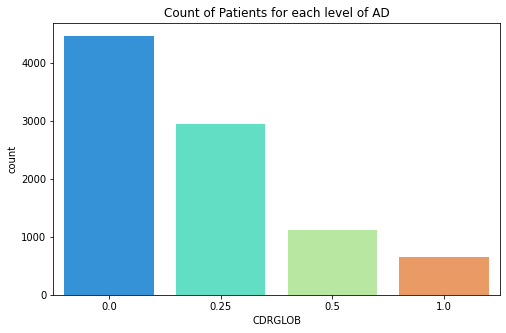

In [ ]:
#Lets check the levels of Alzheimer'S Disease
plt.figure(figsize=(8,5))
sns.countplot(x='CDRGLOB',data=data, palette='rainbow')
plt.title("Count of Patients for each level of AD")


In [ ]:
fig = px.pie(data, names='CDRGLOB', title='Percentage of Disease Levels',
             color_discrete_sequence=px.colors.qualitative.Set2, hole=.3)
fig.show()

Of the participants, %48.6 had no impairment, while %32 had questinable impairment, %12.3 had Mild impairment and %7.09 had Moderate & Severe impairment.

As we can see, the disease level classes are not equally represented in the dataset, which means the dataset we deal with is imbalanced.

In [ ]:
numerical_variables = ['Age', 'Educ']
categorical_variables = list(set(column) - set(numerical_variables))

print('Categorical variable distributions:\n')

for var in categorical_variables :
    print('\nDistribution of', var)
    print(data[var].value_counts())

Categorical variable distributions:


Distribution of Agitation
0    7783
1    1397
Name: Agitation, dtype: int64

Distribution of I_Complex_Assistance
0    7522
1    1658
Name: I_Complex_Assistance, dtype: int64

Distribution of Anxiety
0    7174
1    2006
Name: Anxiety, dtype: int64

Distribution of R_Single
1    8404
0     776
Name: R_Single, dtype: int64

Distribution of R_Group_Living
0    8595
1     585
Name: R_Group_Living, dtype: int64

Distribution of Appetite
0    7824
1    1356
Name: Appetite, dtype: int64

Distribution of Delusions
0    8717
1     463
Name: Delusions, dtype: int64

Distribution of Depression
0    7097
1    2083
Name: Depression, dtype: int64

Distribution of Hallucinations
0    8862
1     318
Name: Hallucinations, dtype: int64

Distribution of Sex
2    5192
1    3988
Name: Sex, dtype: int64

Distribution of Apathy
0    7498
1    1682
Name: Apathy, dtype: int64

Distribution of R_Facility
0    9145
1      35
Name: R_Facility, dtype: int64

Distribution of CD

**Numerical Variable Distributions:**

Ages distribution is right-skewed
* Age: mean = 73, min=65, max=103 - seems to be correct
* Educ: mean = 16, min=0, max=30 - seems to be correct

count    9180.000000
mean       73.447059
std         6.001028
min        65.000000
25%        69.000000
50%        73.000000
75%        77.000000
max       103.000000
Name: Age, dtype: float64

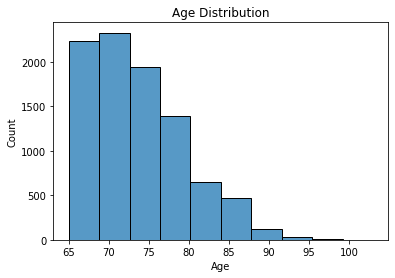

In [ ]:
sns.histplot(data=data, x="Age", bins=10)
plt.title("Age Distribution")
data["Age"].describe()

Age distribution is left-skewed.

(50.0, 100.0)

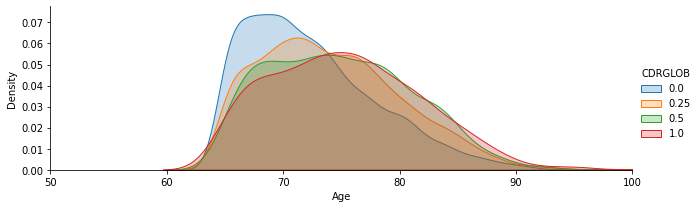

In [ ]:
#Age vs CDRGLOB
f = sns.FacetGrid(data,hue="CDRGLOB", aspect=3)
f.map(sns.kdeplot,'Age',shade= True)
f.set(xlim=(0, data['Age'].max()))
f.add_legend()
plt.xlim(50,100)

Interestingly, when we look a the age- GDRGLOB desity, there is a higher concentration of 80-90 years old in the Moderate & Severe impairment group than those in the Normal impairment group. Intuitively, I would expect Alzheimer's patients would live less.

count    9180.000000
mean       16.071351
std         2.965544
min         0.000000
25%        14.000000
50%        16.000000
75%        18.000000
max        30.000000
Name: Educ, dtype: float64

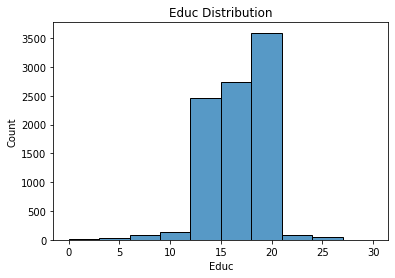

In [ ]:
sns.histplot(data=data, x="Educ", bins=10)
plt.title("Educ Distribution")
data["Educ"].describe()

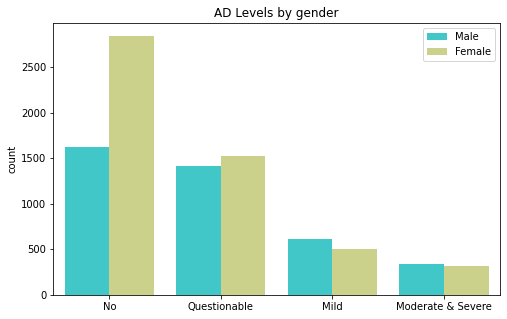

In [ ]:
plt.figure(figsize=(8,5))
f = sns.countplot(x='CDRGLOB', data=data, hue='Sex', palette='rainbow')
plt.legend(['Male', 'Female'])
f.set_title("AD Levels by gender")
f.set_xticklabels(['No', 'Questionable', 'Mild', 'Moderate & Severe'])
plt.xlabel("");

Correlation

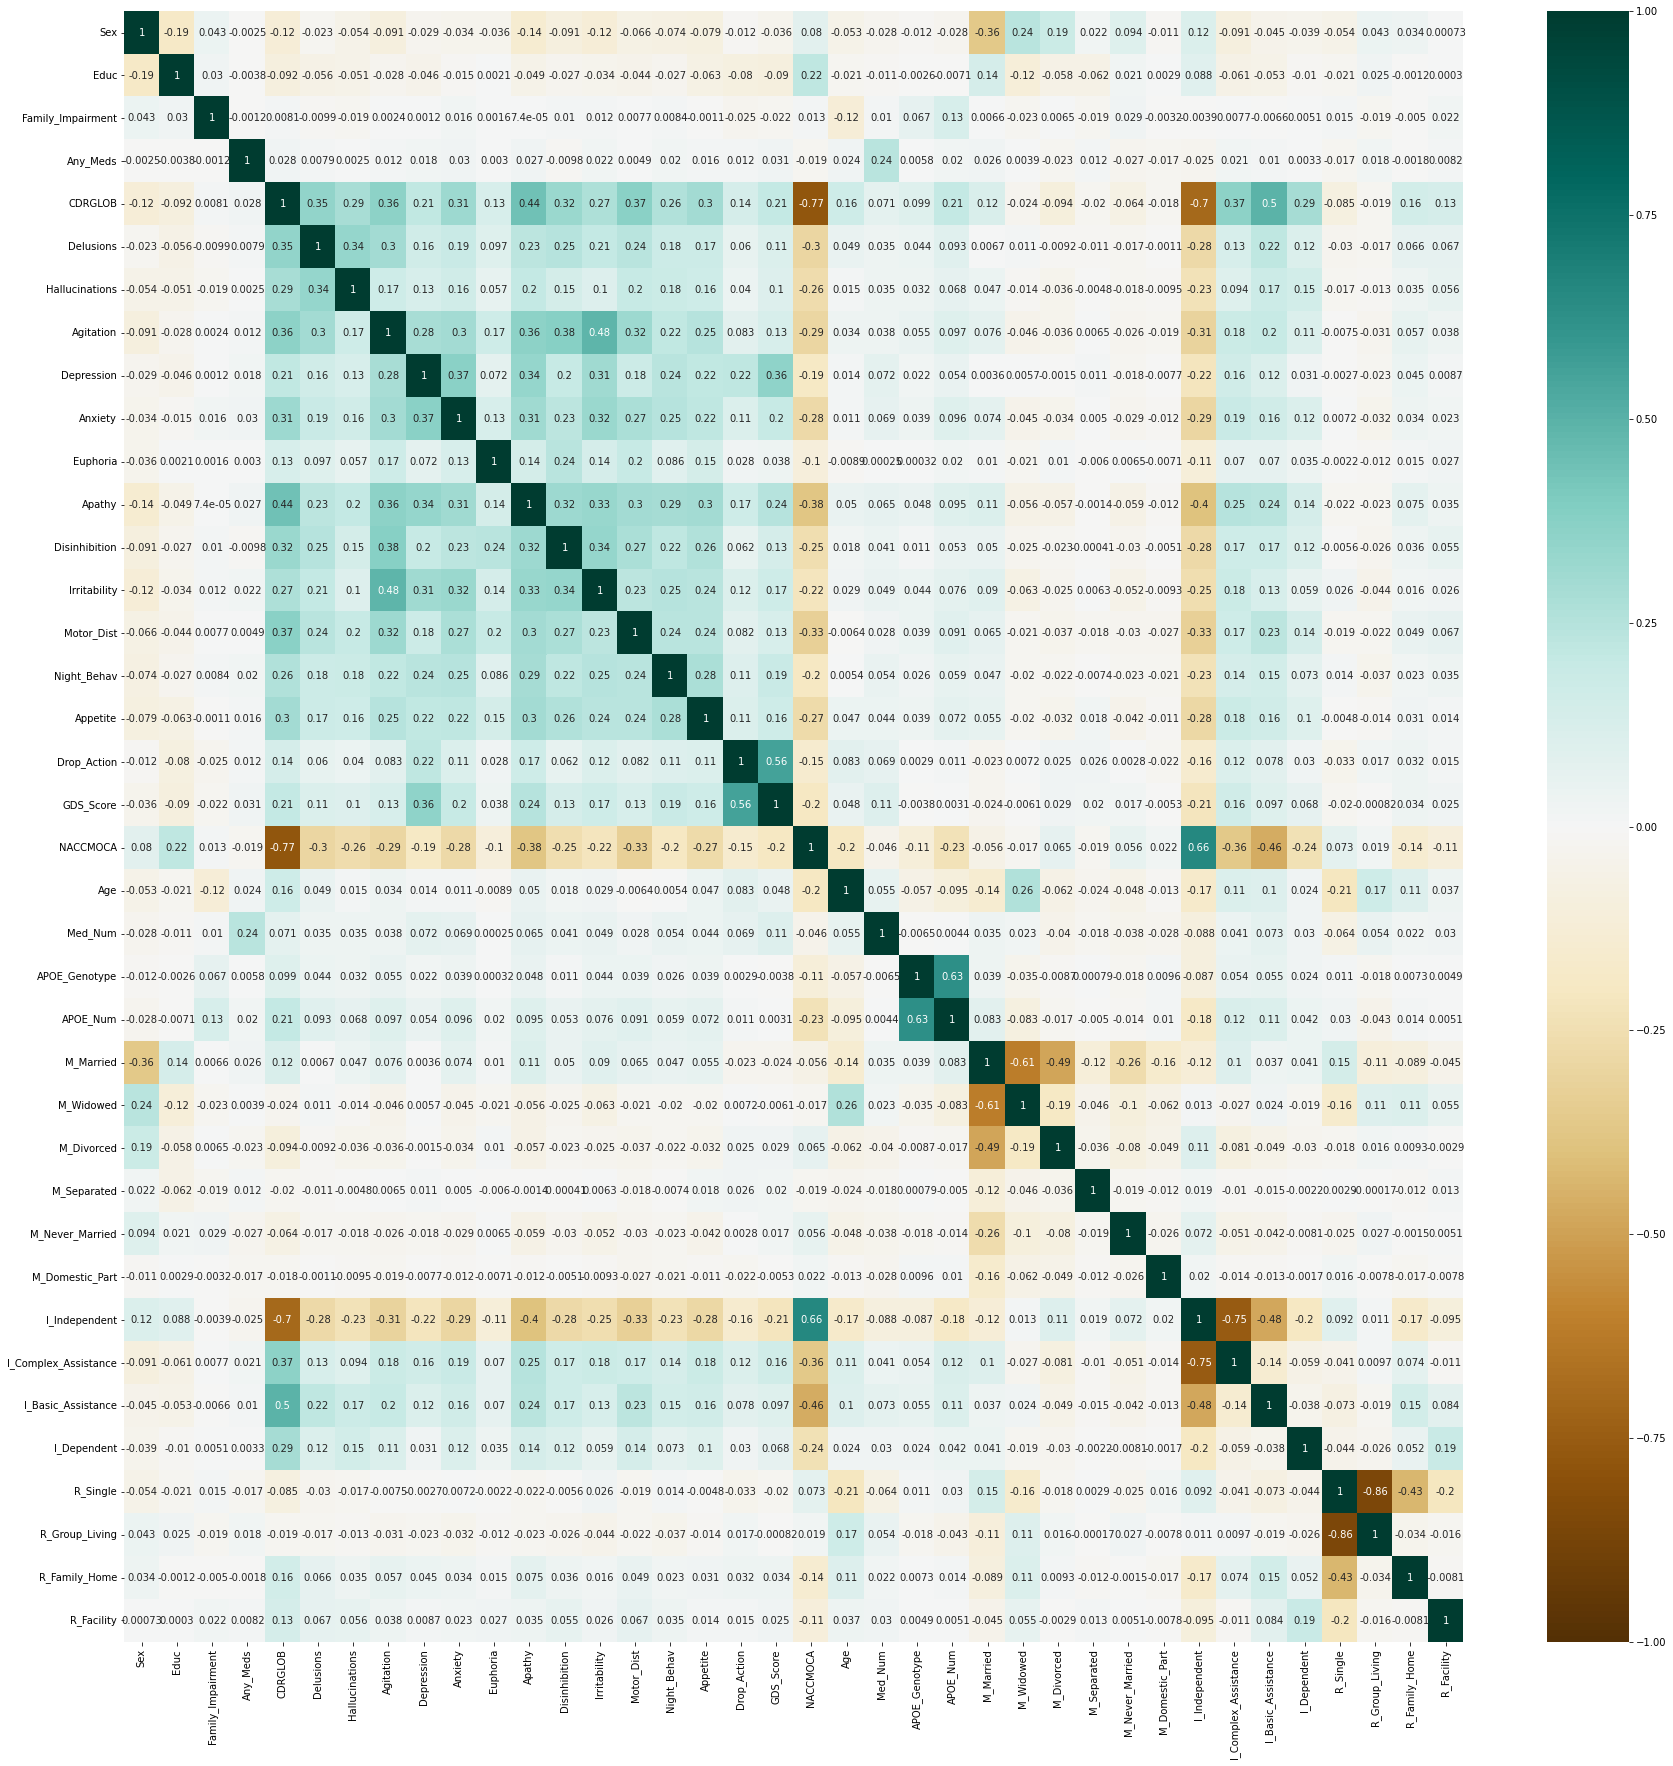

In [ ]:
plt.figure(figsize=(30,30))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

####**Selecting a Baseline Model**

**Modelling and Evaluation**

In [ ]:
data.drop(columns=['I_Independent','R_Group_Living'],inplace=True)



In [ ]:
data.copy()
y = data['CDRGLOB']
X = data.loc[:, data.columns != 'CDRGLOB']

In [ ]:
X

,Sex,Educ,Family_Impairment,Any_Meds,Delusions,Hallucinations,Agitation,Depression,Anxiety,Euphoria,...,M_Divorced,M_Separated,M_Never_Married,M_Domestic_Part,I_Complex_Assistance,I_Basic_Assistance,I_Dependent,R_Single,R_Family_Home,R_Facility
0,1,13,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,16,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2,10,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,20,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,17,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,2,14,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9176,2,18,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9177,2,12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9178,1,18,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y = pd.get_dummies(y, columns = ['CDRGLOB'])
y


,0.00,0.25,0.50,1.00
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
9175,0,1,0,0
9176,0,0,1,0
9177,0,1,0,0
9178,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
y.value_counts()

0.0  0.25  0.5  1.0
1    0     0    0      4465
0    1     0    0      2939
     0     1    0      1125
           0    1       651
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
print(X.shape, y.shape)

(9180, 35) (9180, 4)


In [ ]:
def create_model(lr, input_shape, output_shape):

  model = Sequential()
  model.add(Dense(units=input_shape, activation='relu'))
  model.add(Dropout(rate=0.2))
  model.add(Dense(units=int(input_shape*0.65), activation='relu'))
  model.add(Dropout(rate=0.15))
  model.add(Dense(units=int(input_shape*0.30), activation='relu'))
  model.add(Dropout(rate=0.1))
  model.add(Dense(units=output_shape, activation='softmax'))

  model.compile(optimizer=Adam(lr=lr),
                loss="categorical_crossentropy",
               			metrics=[
					tf.keras.metrics.BinaryAccuracy(name='accuracy'),
					tf.keras.metrics.Precision(name='precision'),
					tf.keras.metrics.Recall(name='recall')
			])

  return model

In [ ]:
def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.15):

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True,
                      validation_split=validation_split)

  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

In [ ]:
def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)
  plt.legend()


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



52/52 [==============================] - 2s 13ms/step - loss: 1.8151 - accuracy: 0.7283 - precision: 0.4107 - recall: 0.1996 - val_loss: 1.0671 - val_accuracy: 0.8126 - val_precision: 0.8084 - val_recall: 0.3279
Epoch 2/100
52/52 [==============================] - 0s 4ms/step - loss: 1.0642 - accuracy: 0.7819 - precision: 0.6210 - recall: 0.3271 - val_loss: 0.9151 - val_accuracy: 0.8181 - val_precision: 0.7027 - val_recall: 0.4722
Epoch 3/100
52/52 [==============================] - 0s 4ms/step - loss: 0.9654 - accuracy: 0.8002 - precision: 0.6791 - recall: 0.3810 - val_loss: 0.8644 - val_accuracy: 0.8249 - val_precision: 0.7356 - val_recall: 0.4680
Epoch 4/100
52/52 [==============================] - 0s 4ms/step - loss: 0.9267 - accuracy: 0.8077 - precision: 0.7123 - recall: 0.3872 - val_loss: 0.8296 - val_accuracy: 0.8292 - val_precision: 0.7700 - val_recall: 0.4518
Epoch 5/100
52/52 [==============================] - 0s 4ms/step - loss: 0.8990 - accuracy: 0.8107 - precision: 0.7315 

[0.6467446088790894,
 0.8562091588973999,
 0.7248270511627197,
 0.6848220825195312]

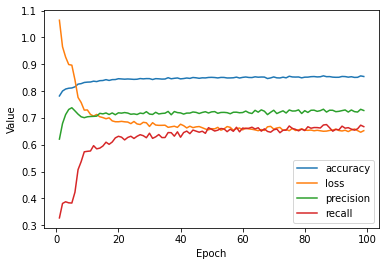

In [ ]:
learning_rate = 0.005
epochs = 100
batch_size = 128
validation_split = 0.15

my_model = create_model(learning_rate, X_train.shape[1], y_train.shape[1])

epochs, hist = train_model(my_model, X_train, y_train,
                           epochs, batch_size, validation_split)

list_of_metrics_to_plot = ["accuracy","loss","precision","recall"]
plot_curve(epochs, hist, list_of_metrics_to_plot)


print("\n Evaluating the model against the test set:")
my_model.evaluate(x=X_test, y=y_test, batch_size=batch_size)

In [ ]:
y_test_labels = np.argmax(y_test.to_numpy(), axis = 1)


In [ ]:
y_pred = np.argmax(my_model.predict(X_test),axis =1)
y_pred

array([1, 2, 2, ..., 0, 1, 0])

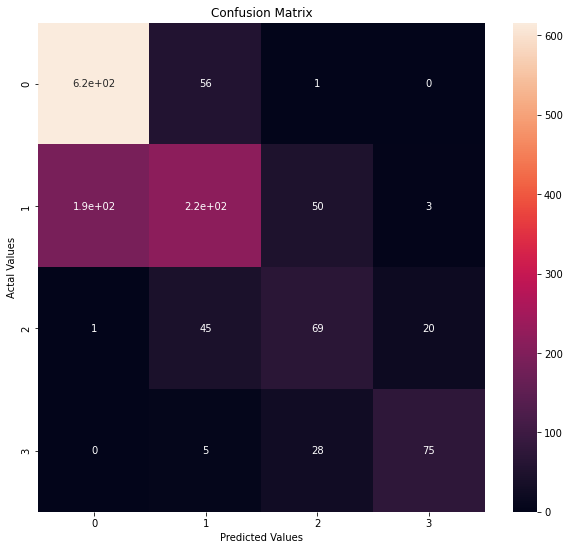

In [ ]:
cm = confusion_matrix(y_test_labels,y_pred)
plt.figure(figsize=(10,9))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
score = f1_score(y_test_labels, y_pred, average = "micro")
score

0.710239651416122